Lien Github projet: https://github.com/nimra-boy/ML-Stackoverflow-tags-generator


Lien Github API: https://github.com/nimra-boy/API_Tags_Generator/

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (18,12)

import seaborn as sns

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Loading datasets

SQL Query :

**SELECT** Title, Body, Tags

**From** Posts

**WHERE** PostTypeId = 1

**AND** CreationDate  between '2016-01-01' and DATEADD(m, 48, '2016-01-01')

**AND** len(Tags) > 0

**AND** Score > 50



In [4]:
df = pd.read_csv('./stackoverflowDf.csv')

# Dataset visualization

In [2]:
def describeDatasets(df):
    printmd('**Shape du dataset**')
    print(df.shape)
    printmd('**Présence de valeurs manquantes dans le dataset**')
    print(df.isnull().sum())
    printmd('**Informations sur le dataset**')
    print(df.info())
    printmd('**Description dataset**')
    for col in df.columns:
        printmd(f'**{col}**')
        print(df[col].describe())
    printmd('**Aperçu du dataset**')
    return df

In [5]:
describeDatasets(df).head()

**Shape du dataset**

(13127, 3)


**Présence de valeurs manquantes dans le dataset**

Title    0
Body     0
Tags     0
dtype: int64


**Informations sur le dataset**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13127 entries, 0 to 13126
Data columns (total 3 columns):
Title    13127 non-null object
Body     13127 non-null object
Tags     13127 non-null object
dtypes: object(3)
memory usage: 307.8+ KB
None


**Description dataset**

**Title**

count                                                13127
unique                                               13127
top       No Application Encryption Key Has Been Specified
freq                                                     1
Name: Title, dtype: object


**Body**

count                                                 13127
unique                                                13127
top       <p>I just read an Article related to promise a...
freq                                                      1
Name: Body, dtype: object


**Tags**

count         13127
unique         9579
top       <angular>
freq            122
Name: Tags, dtype: object


**Aperçu du dataset**

,Title,Body,Tags
0,Problems publishing a website on smarterasp.ne...,"<p>I am using Microsoft Visual Studio 2015, I ...",<c#><asp.net><visual-studio-2015>
1,Make selected block of text uppercase,<p>Can I make a multi-line selection of text a...,<visual-studio-code>
2,Git diff in summary?,"<p>With <code>git pull</code>, it shows a diff...",<git>
3,Is there an explanation for inline operators i...,<p>What is the explanation for the result from...,<c#><cil><compound-assignment>
4,react-native: command not found,<p>I am getting <strong><em>-bash: react-nativ...,<android><ios><react-native>


13 127 lines

No null values

# Text preprocessing

* Remove html tags (BeautifulSoup)
* Removing non-letter characters
* Lowercase everything
* Tokenization (transform a text into a series of individual tokens)
* Standardization => Lemmatization (group words of the same family)
* Remove stops words

In [29]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arminarnautovic/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arminarnautovic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [31]:
from textblob import TextBlob

In [32]:
def detectLang(txt):
    try:
        return TextBlob(txt).detect_language()
    except:
        return 'null'

In [33]:
def preprocess_text(text):
    # remove code tag
    soup = BeautifulSoup(text,"lxml")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    # remove html tag
    txt_without_html_tag = soup.get_text()
    # only letters
    letters_only = re.sub("[^a-zA-Z]", " ", txt_without_html_tag)
    #lowercase
    lowercase = letters_only.lower()
    # Create an instance of RegexpTokenizer for alphanumeric tokens
    tokeniser = RegexpTokenizer(r'\w+')
    # Tokenise string
    tokens = tokeniser.tokenize(lowercase)
    # Create an instance of WordNetLemmatizer
    lemmatiser = WordNetLemmatizer()
    # lemmatise tokens
    lemmas = [lemmatiser.lemmatize(token, pos='v') for token in tokens]
    # Remove stops words
    keywords = [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

## Exemple

In [40]:
df['Body'].iloc[4]

'<p>I am getting <strong><em>-bash: react-native: command not found error</em></strong> while creating react-native project.</p>\n\n<p>Below are the additional info</p>\n\n<pre><code>1. brew --version\n   homebrew 0.9.9\n2  brew info watchman\n   watchman `enter code here`stable 4.50\n   /usr/local/Cellar/watchman/4.4.0\n3. brew info flow\n   stable 0.24.1\n   /usr/local/Cellar/flow/0.24.1\n4. brew info node\n   stable 6.1.0\n   /usr/local/Cellar/node/6.1.0\n5. npm -version\n   3.8.6\n6. echo $PATH\n/Users/Ashok/.rbenv/shims:/Users/Ashok/.rbenv/shims:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin\n</code></pre>\n\n<p>I tried suggested steps from the below link but still i am getting same error.</p>\n\n<ol>\n<li><a href="https://stackoverflow.com/questions/33282545/bash-react-native-command-not-found">react-native-command-not-found</a></li>\n</ol>\n\n<p>I don\'t have any "npm" directory which they have specified in the solution </p>\n\n<pre><code>Ashoks-MacBook-Pro:share Ashok$ ls\nacloca

In [41]:
preprocess_text(df['Body'].iloc[4])

['get',
 'bash',
 'react',
 'native',
 'command',
 'find',
 'error',
 'create',
 'react',
 'native',
 'project',
 'additional',
 'info',
 'try',
 'suggest',
 'step',
 'link',
 'still',
 'get',
 'error',
 'react',
 'native',
 'command',
 'find',
 'npm',
 'directory',
 'specify',
 'solution',
 'find',
 'npm',
 'file',
 'exist',
 'location',
 'uninstalled',
 'react',
 'native',
 'instal',
 'still',
 'face',
 'issue']

## TF-IDF Exemple

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [14]:
def vectorize_text(col):
    # Create an instance of TfidfVectorizer
    vectoriser = TfidfVectorizer(analyzer=preprocess_text)
    # Fit to the data and transform to tf-idf
    X_train = vectoriser.fit_transform(col)
    # Convert sparse matrix to dataframe
    X_train = pd.DataFrame.sparse.from_spmatrix(X_train)
    # Save mapping on which index refers to which words
    col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
    # Rename each column using the mapping
    for col in X_train.columns:
        X_train.rename(columns={col: col_map[col]}, inplace=True)
    return X_train

In [15]:
%time vectorize_text(df["Body"][0:5])

CPU times: user 1.98 s, sys: 42.3 ms, total: 2.03 s
Wall time: 2.03 s


,access,actually,additional,ago,allow,ask,assign,bash,bin,block,build,c,cannot,capitals,change,cil,code,command,compile,contact,could,create,csc,ctrl,currently,delete,deny,detail,diff,directory,dont,elsewhere,error,exception,exe,execute,exist,explanation,extension,externalexception,face,file,find,fine,follow,form,ftp,full,generate,get,however,include,info,instal,interpret,issue,k,like,line,link,localhost,location,look,make,microsoft,multi,native,net,non,note,npm,operation,output,perfectly,profound,program,project,publish,question,react,result,roslyn,run,say,see,selection,server,shift,show,similar,simple,smarterasp,solution,solve,specify,split,step,still,struggle,studio,suggest,summary,tell,text,try,u,ui,understand,uninstalled,use,value,visual,way,website,win,work,x,years
0,0.09027,0.000000,0.000000,0.000000,0.09027,0.000000,0.000000,0.000000,0.180539,0.000000,0.09027,0.09027,0.09027,0.000000,0.000000,0.000000,0.000000,0.060455,0.09027,0.180539,0.09027,0.000000,0.361079,0.000000,0.000000,0.09027,0.09027,0.000000,0.000000,0.000000,0.09027,0.000000,0.145658,0.09027,0.451349,0.180539,0.000000,0.000000,0.000000,0.09027,0.000000,0.145658,0.072829,0.09027,0.000000,0.09027,0.09027,0.000000,0.000000,0.203426,0.09027,0.09027,0.000000,0.000000,0.000000,0.072829,0.00000,0.000000,0.000000,0.000000,0.09027,0.000000,0.000000,0.000000,0.09027,0.000000,0.000000,0.180539,0.000000,0.000000,0.000000,0.000000,0.000000,0.09027,0.000000,0.09027,0.072829,0.180539,0.000000,0.000000,0.00000,0.180539,0.09027,0.09027,0.000000,0.000000,0.09027,0.000000,0.000000,0.000000,0.09027,0.180539,0.000000,0.09027,0.000000,0.000000,0.000000,0.000000,0.000000,0.060455,0.000000,0.000000,0.000000,0.000000,0.181364,0.000000,0.000000,0.000000,0.000000,0.060455,0.000000,0.060455,0.000000,0.180539,0.09027,0.072829,0.180539,0.000000
1,0.00000,0.000000,0.000000,0.161526,0.00000,0.161526,0.000000,0.000000,0.000000,0.161526,0.00000,0.00000,0.00000,0.161526,0.161526,0.000000,0.260637,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.161526,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.130318,0.000000,0.161526,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.161526,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.323052,0.000000,0.00000,0.000000,0.000000,0.161526,0.00000,0.323052,0.000000,0.000000,0.161526,0.161526,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.161526,0.000000,0.00000,0.000000,0.00000,0.00000,0.161526,0.161526,0.00000,0.161526,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324528,0.000000,0.000000,0.000000,0.161526,0.000000,0.161526,0.161526,0.000000,0.000000,0.000000,0.000000,0.324528,0.000000,0.000000,0.00000,0.000000,0.000000,0.161526
2,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.203173,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.303374,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.170916,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.606748,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.244760,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.303374,0.303374,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203173,0.000000,0.000000,0.303374,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.00000,0.121798,0.000000,0.000000,0.00000,0.000000,0.121798,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000

## Clean tag

In [42]:
def cleanTags(data):
    # Replace open and close balise between tags
    data['Tags'] = data['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))
    # Delete last "," for each row
    data['Tags'] = data['Tags'].str[:-1]

In [43]:
%time cleanTags(df)

CPU times: user 40.8 ms, sys: 4.29 ms, total: 45.1 ms
Wall time: 45.4 ms


In [44]:
def count_split_tags(df, column, separator):
    list_words = []
    for word in df[column].str.split(separator):
        list_words.extend(word)
    df_list_words = pd.DataFrame(list_words, columns=["Tag"])
    df_list_words = df_list_words.groupby("Tag")\
        .agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    df_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return df_list_words

In [48]:
tags_list = count_split_tags(df=df, column='Tags', separator=',')
print("The dataset has {} tags.".format(tags_list.shape[0]))

The dataset has 4820 tags.


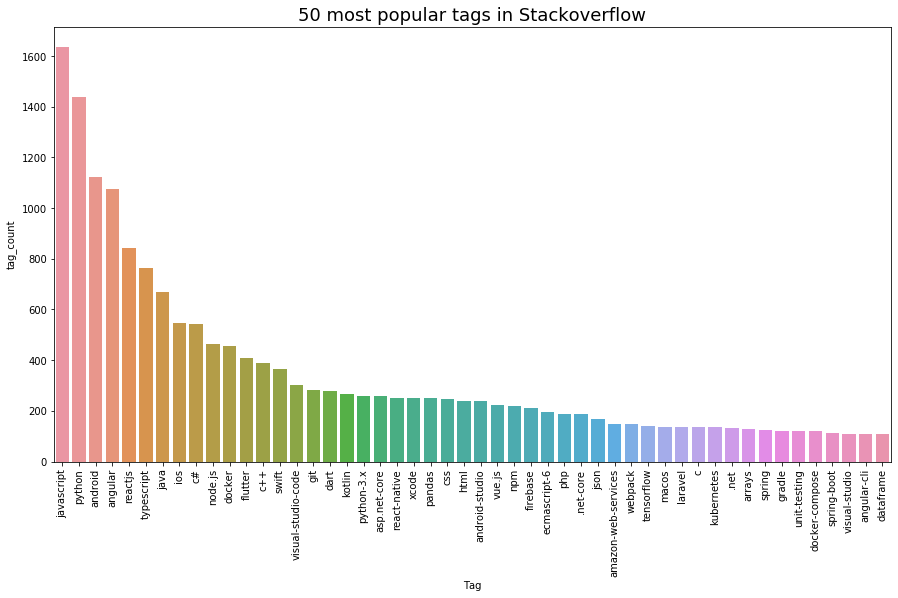

In [50]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:50, :], x=tags_list.iloc[0:50, :].index, y="tag_count")
plt.xticks(rotation=90)
plt.title("50 most popular tags in Stackoverflow", fontsize=18)
plt.show()

In [52]:
from wordcloud import WordCloud

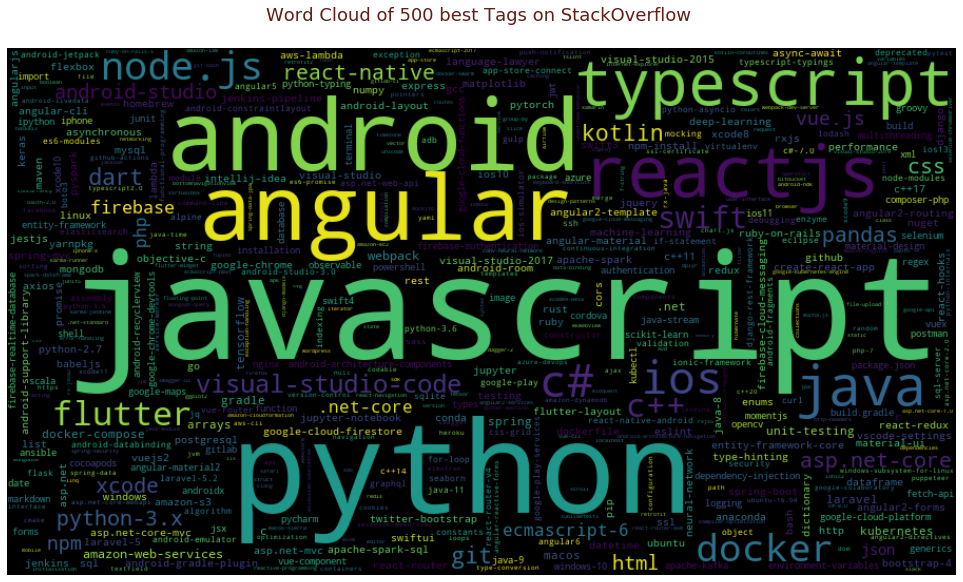

In [53]:
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(tags_list.to_dict()['tag_count'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 500 best Tags on StackOverflow \n", fontsize=18, color="#641E16")
plt.show()

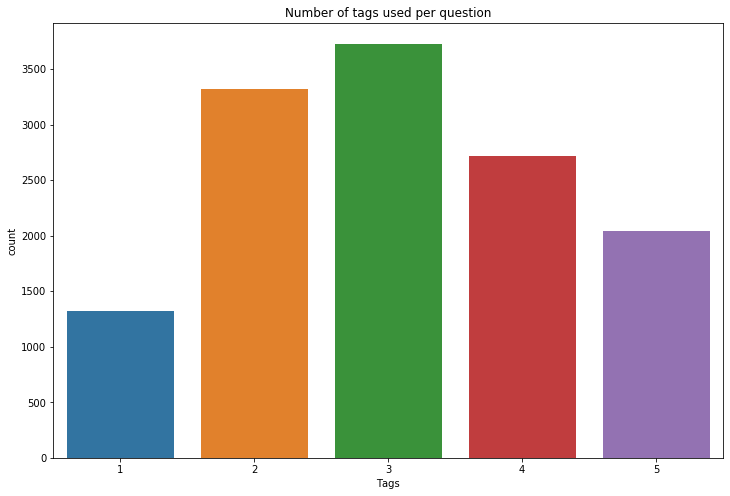

In [54]:
df['Tags_list'] = df['Tags'].str.split(',')
df['Tags_count'] = df['Tags_list'].apply(lambda x: len(x))

fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Tags_count)
ax.set_xlabel("Tags")
plt.title("Number of tags used per question")
plt.show()

## Filter the dataset with the 50 most used tags

In [24]:
def filter_tag(x, top_list):
    temp_list = []
    for item in x:
        if (item in top_list):
            temp_list.append(item)
    return temp_list

In [25]:
top_tags = list(tags_list.iloc[0:50].index)

In [26]:
top_tags

['javascript',
 'python',
 'android',
 'angular',
 'reactjs',
 'typescript',
 'java',
 'ios',
 'c#',
 'node.js',
 'docker',
 'flutter',
 'c++',
 'swift',
 'visual-studio-code',
 'git',
 'dart',
 'kotlin',
 'python-3.x',
 'asp.net-core',
 'react-native',
 'xcode',
 'pandas',
 'css',
 'html',
 'android-studio',
 'vue.js',
 'npm',
 'firebase',
 'ecmascript-6',
 'php',
 '.net-core',
 'json',
 'amazon-web-services',
 'webpack',
 'tensorflow',
 'macos',
 'laravel',
 'c',
 'kubernetes',
 '.net',
 'arrays',
 'spring',
 'gradle',
 'unit-testing',
 'docker-compose',
 'spring-boot',
 'visual-studio',
 'angular-cli',
 'dataframe']

In [27]:
df['Tags_list'] = df['Tags_list'].apply(lambda x: filter_tag(x, top_tags))

In [28]:
df['number_of_tags'] = df['Tags_list'].apply(lambda x : len(x))

In [29]:
data = df[df.number_of_tags > 0]
print("New size of dataset : {} questions.".format(data.shape[0]))

New size of dataset : 11244 questions.


In [32]:
# %time data['lang'] = data['Title'].apply(detectLang)

In [33]:
# data['lang'].describe()

In [34]:
# data = data[minifiedDataset['lang'] == 'en']

In [37]:
%time data['clean_body'] = data['Body'].apply(preprocess_text)

CPU times: user 2min 9s, sys: 31.9 s, total: 2min 41s
Wall time: 3min 7s


In [38]:
%time data['clean_title'] = data['Title'].apply(preprocess_text)

CPU times: user 17.2 s, sys: 3.8 s, total: 21 s
Wall time: 21.2 s


In [39]:
data['body_tokens_count'] = [len(x) for x in data['clean_body']]
data['title_tokens_count'] = [len(x) for x in data['clean_title']]

In [40]:
data['body_tokens_count'].describe()

count    11244.000000
mean        40.601298
std         43.219262
min          0.000000
25%         19.000000
50%         31.000000
75%         48.000000
max       1539.000000
Name: body_tokens_count, dtype: float64

In [41]:
full_corpus = []
for i in data['clean_body']:
    full_corpus.extend(i)

In [42]:
body_dist = nltk.FreqDist(full_corpus)
body_dist = pd.DataFrame(body_dist.most_common(2000),
                         columns=['Word', 'Frequency'])
body_dist.describe()

,Frequency
count,2000.000000
mean,206.289000
std,462.479106
min,23.000000
25%,38.000000
50%,73.000000
75%,189.250000
max,10016.000000


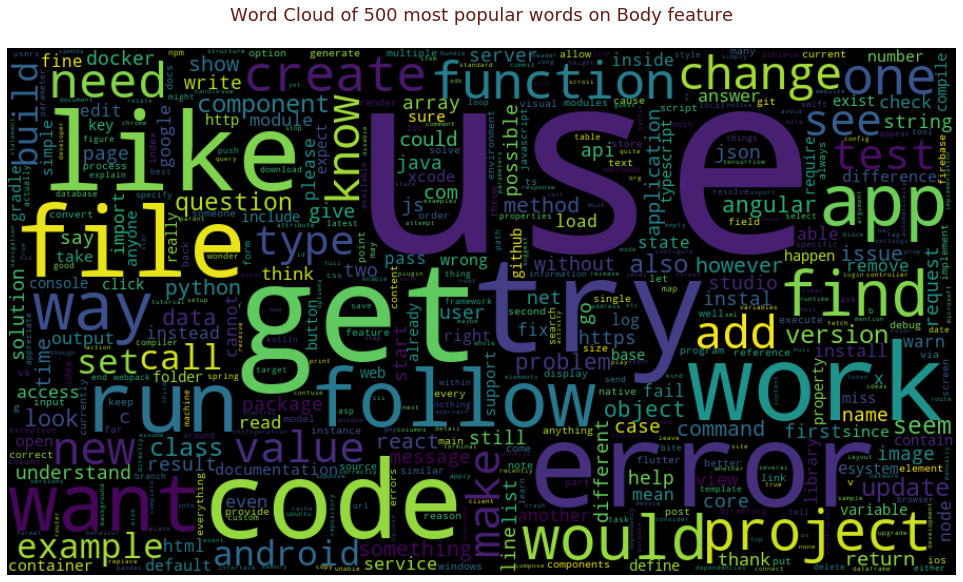

In [43]:
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(body_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 500 most popular words on Body feature\n",
          fontsize=18, color="#641E16")
plt.show()

In [44]:
full_corpus_t = []
for i in data['clean_title']:
    full_corpus_t.extend(i)

In [45]:
title_dist = nltk.FreqDist(full_corpus_t)
title_dist = pd.DataFrame(title_dist.most_common(500),
                          columns=['Word', 'Frequency'])

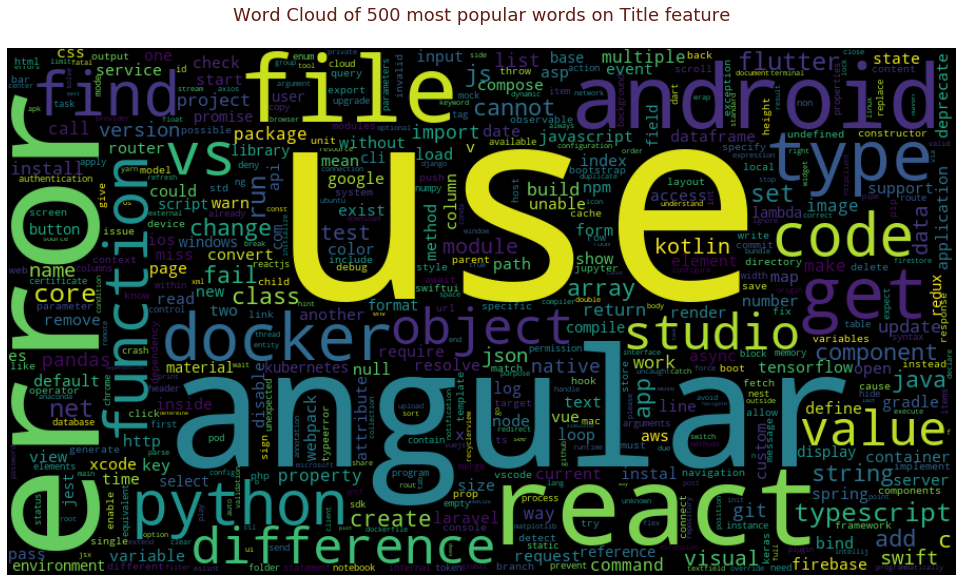

In [46]:
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(title_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Word Cloud of 500 most popular words on Title feature\n",
          fontsize=18, color="#641E16")
plt.show()

In [47]:
finalData = data[[
    'clean_body',
    'clean_title',
    'Tags_list'
]]

finalData = finalData.rename(columns={ 'clean_body': 'Body', 'clean_title': 'Title', 'Tags_list': 'Tags' })

finalData.head()

,Body,Title,Tags
0,"[use, microsoft, visual, studio, build, simple...","[problems, publish, website, smarterasp, net, ...",[c#]
1,"[make, multi, line, selection, text, capitals,...","[make, select, block, text, uppercase]",[visual-studio-code]
2,"[show, diff, summary, like, way, use, command,...","[git, diff, summary]",[git]
3,"[explanation, result, follow, operation, try, ...","[explanation, inline, operators, k, c, k, c]",[c#]
4,"[get, bash, react, native, command, find, erro...","[react, native, command, find]","[android, ios, react-native]"


In [48]:
finalData['Corpus'] = finalData['Body'] + finalData['Title']

In [49]:
finalData = finalData[['Corpus', 'Tags']]
finalData

,Corpus,Tags
0,"[use, microsoft, visual, studio, build, simple...",[c#]
1,"[make, multi, line, selection, text, capitals,...",[visual-studio-code]
2,"[show, diff, summary, like, way, use, command,...",[git]
3,"[explanation, result, follow, operation, try, ...",[c#]
4,"[get, bash, react, native, command, find, erro...","[android, ios, react-native]"
...,...,...
13121,"[try, run, container, already, image, upload, ...","[docker, docker-compose]"
13123,"[try, figure, use, pipe, within, reactive, for...",[angular]
13124,"[upgrade, android, studio, today, seem, add, l...","[android, android-studio]"
13125,"[upgrade, android, studio, today, android, stu...","[android, android-studio]"


In [50]:
finalData.to_csv('cleanDfStackOverflow.csv')